In [139]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [4]:
flowers_dir = os.path.join("/data/carescope_data/")
flowers_dir

'/data/carescope_data/'

In [18]:
import json
with open(flowers_dir+'img_emotion_validation_data(중립).json', "r") as  f:
    neutrual_labels = json.load(f)
    print(len(os.listdir(flowers_dir+'[원천]EMOIMG_중립_VALID')), len(neutrual_labels))
    f.close()

7403 7403


In [27]:
neutrual_labels[0]

{'filename': 'aafa5eabafcbea5d767fce00a421b73715324c2721504047003837f17702bb77_여_20_중립_숙박 및 거주공간_20210122232424-010-052.jpg',
 'gender': '여',
 'age': 20,
 'isProf': '일반인',
 'faceExp_uploader': '중립',
 'bg_uploader': '숙박 및 거주공간',
 'annot_A': {'boxes': {'maxX': 2165.4037656122105,
   'maxY': 1793.0847936546108,
   'minX': 1200.8929824890438,
   'minY': 409.2458099948438},
  'faceExp': '중립',
  'bg': '숙박 및 거주공간'},
 'annot_B': {'boxes': {'maxX': 2143.8567,
   'maxY': 1732.2981000000002,
   'minX': 1172.2122,
   'minY': 419.81335},
  'faceExp': '중립',
  'bg': '숙박 및 거주공간'},
 'annot_C': {'boxes': {'maxX': 2143.8567,
   'maxY': 1732.2981000000002,
   'minX': 1172.2122,
   'minY': 419.81335},
  'faceExp': '중립',
  'bg': '숙박 및 거주공간'}}

In [36]:
a_box = neutrual_labels[0]["annot_A"]["boxes"]
print(a_box)

{'maxX': 2165.4037656122105, 'maxY': 1793.0847936546108, 'minX': 1200.8929824890438, 'minY': 409.2458099948438}


In [25]:
test_file_name = neutrual_labels[0]["filename"]

aafa5eabafcbea5d767fce00a421b73715324c2721504047003837f17702bb77_여_20_중립_숙박 및 거주공간_20210122232424-010-052.jpg


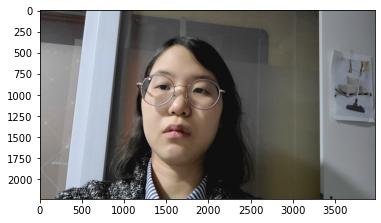

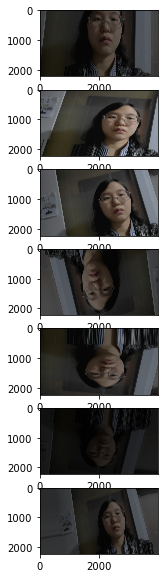

In [26]:
#@ Image Augmentaion 
image_path = os.path.join('/data/carescope_data/',
                          '[원천]EMOIMG_중립_VALID',
                          test_file_name)
img = load_img(image_path)
plt.imshow(img)
plt.show()
x = img_to_array(img)
x = x[np.newaxis, ...]
augmentator = ImageDataGenerator(rescale=0.8, # 축소
                                 rotation_range=15, # 회전
                                 width_shift_range=0.1, # 가로 변형
                                 height_shift_range=0.2, # 세로변형
                                 zoom_range=0.3, # 줌
                                 horizontal_flip=True, # 수평 반전
                                 vertical_flip=True,  # 수직 반전
                                 brightness_range=[0.2, 1], # 밝기 변형
                                 channel_shift_range=0.2, # 채널(?) 변형
                                 shear_range=0.4, # ???
                                 featurewise_center=True, # 중심 영역 유지(?)
                                 samplewise_center=False,)
gen = augmentator.flow(x,
                       batch_size=1)
plt.figure(figsize=(10,10))
for i in range(7):
    plt.subplot(7,1, i+1)
    batch = gen.next()
    img = batch[0].astype('uint8')
    plt.imshow(img)
    # save_img(f"img_test.jpg",x=img)
plt.show()

In [83]:
print(a_box["maxY"]-a_box["minY"])
print(a_box["maxX"]-a_box["minX"])

1383.838983659767
964.5107831231667


In [89]:
y_pad = (2240-(a_box["maxY"]-a_box["minY"]))/2
x_pad = (2240-(a_box["maxX"]-a_box["minX"]))/2

In [102]:
a_box["minY"]

409.2458099948438

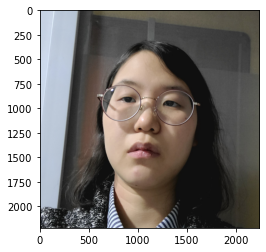

<Figure size 720x720 with 0 Axes>

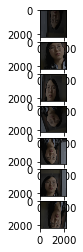

In [110]:
boxed = x[0][0 if a_box["minY"]<y_pad else int(a_box["minY"]-y_pad):int(a_box["maxY"]+y_pad),
             0 if a_box["minX"]<x_pad else int(a_box["minX"]-x_pad):int(a_box["maxX"]+x_pad)]
# boxed.astype("uint8")
# save_img(f"img_test.jpg",
#          x=boxed)
boxed = boxed.reshape([1]+[s for s in boxed.shape])
gen = augmentator.flow(boxed,
                       batch_size=1)
plt.imshow(boxed[0].astype('uint8'))
plt.figure(figsize=(10,10))
plt.show()
for i in range(7):
    plt.subplot(7,1, i+1)
    batch = gen.next()
    img = batch[0].astype('uint8')
    plt.imshow(img)


In [45]:
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

In [50]:
!nvidia-smi

Tue Jul 26 12:07:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:06.0 Off |                    0 |
| N/A   53C    P0    32W /  70W |    248MiB / 15109MiB |     73%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            On   | 00000000:00:07.0 Off |                    0 |
| N/A   

In [111]:
import json


with open(flowers_dir+'img_emotion_validation_data(중립).json', "r") as  f:
    neutrual_labels = json.load(f)
    print(len(os.listdir(flowers_dir+'[원천]EMOIMG_중립_VALID')), len(neutrual_labels))
    f.close()
a_box = neutrual_labels[0]["annot_A"]["boxes"]
print(a_box)
test_file_name = neutrual_labels[0]["filename"]
image_path = os.path.join('/data/carescope_data/',
                          '[원천]EMOIMG_중립_VALID',
                          test_file_name)
y_pad = (2240-(a_box["maxY"]-a_box["minY"]))/2
x_pad = (2240-(a_box["maxX"]-a_box["minX"]))/2
boxed = x[0][0 if a_box["minY"]<y_pad else int(a_box["minY"]-y_pad):int(a_box["maxY"]+y_pad),
             0 if a_box["minX"]<x_pad else int(a_box["minX"]-x_pad):int(a_box["maxX"]+x_pad)]
# boxed.astype("uint8")
# save_img(f"img_test/img_test.jpg",
#          x=boxed)

7403 7403
{'maxX': 2165.4037656122105, 'maxY': 1793.0847936546108, 'minX': 1200.8929824890438, 'minY': 409.2458099948438}


In [134]:
json_list = [dir_name for dir_name in os.listdir(flowers_dir) if dir_name.endswith(".json")] 

In [148]:
from tqdm.auto import tqdm
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

for dir_name in os.listdir(flowers_dir):
    path = flowers_dir+dir_name
    if os.path.isdir(path):
        for j_f in json_list:
            img_label = re.compile('[^ ㄱ-ㅣ가-힣]+').sub('',j_f) 
            if img_label in dir_name:
                with open(flowers_dir+j_f, "r") as  f:
                    dir_labels = json.load(f)
                    f.close()
                    break
        print(dir_name, len(os.listdir(flowers_dir+dir_name)), len(dir_labels))
        for imgs in tqdm(dir_labels):
            a_box = imgs["annot_A"]["boxes"]
            test_file_name = imgs["filename"]
            image_path = os.path.join(flowers_dir,
                                      dir_name,
                                      test_file_name)
            img = load_img(image_path)
            x = img_to_array(img)
            x = x[np.newaxis, ...]
            y_pad = (2240-(a_box["maxY"]-a_box["minY"]))/2
            x_pad = (2240-(a_box["maxX"]-a_box["minX"]))/2
            boxed = x[0][0 if a_box["minY"]<y_pad else int(a_box["minY"]-y_pad):int(a_box["maxY"]+y_pad),
                         0 if a_box["minX"]<x_pad else int(a_box["minX"]-x_pad):int(a_box["maxX"]+x_pad)]
            save_img(f"/data/caer_img_data/{dir_name}/{test_file_name}",
                      x=boxed)
            

/home/ubuntu/anaconda3/envs/img_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[원천]EMOIMG_슬픔_VALID 7479 7479


100%|██████████| 7479/7479 [41:16<00:00,  3.02it/s]  


[원천]EMOIMG_기쁨_VALID 7512 7512


100%|██████████| 7512/7512 [41:36<00:00,  3.01it/s]  


[원천]EMOIMG_중립_VALID 7403 7403


100%|██████████| 7403/7403 [40:37<00:00,  3.04it/s] 


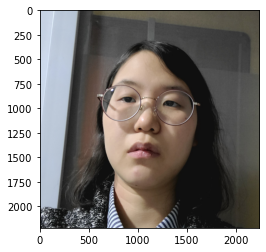

<Figure size 720x720 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: 'img_test/img_test.jpg'

In [140]:
plt.imshow(boxed.astype('uint8'))
plt.figure(figsize=(10,10))
plt.show()
# save_img(f"img_test/img_test.jpg",
#          x=boxed)